In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bering = pd.read_excel(filepath, sheet_name='Bering-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Bering)
fp.date_time(Bering)

,Extent,Date
0,320266.650,1979-01-01
1,541778.338,1979-02-01
2,638262.988,1979-03-01
3,423025.159,1979-04-01
4,215587.216,1979-05-01
...,...,...
488,317377.493,2023-05-01
489,39601.476,2023-06-01
490,16935.702,2023-07-01
491,1305.744,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bering['Extent'] = scaler.fit_transform(Bering['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 4
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bering['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((478, 12, 1), (478,))

In [8]:
X_train, y_train = X[:382], y[:382]
X_val, y_val = X[382:430], y[382:430]
X_test, y_test = X[430:], y[430:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bering_model_LT4/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
43/48 [=========================>....] - ETA: 0s - loss: 0.1579 - root_mean_squared_error: 0.3974

INFO:tensorflow:Assets written to: Bering_model_LT4\assets


INFO:tensorflow:Assets written to: Bering_model_LT4\assets


48/48 [==============================] - 7s 92ms/step - loss: 0.1516 - root_mean_squared_error: 0.3893 - val_loss: 0.0650 - val_root_mean_squared_error: 0.2549
Epoch 2/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0945 - root_mean_squared_error: 0.3075

INFO:tensorflow:Assets written to: Bering_model_LT4\assets


INFO:tensorflow:Assets written to: Bering_model_LT4\assets


48/48 [==============================] - 3s 66ms/step - loss: 0.0934 - root_mean_squared_error: 0.3057 - val_loss: 0.0516 - val_root_mean_squared_error: 0.2273
Epoch 3/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0743 - root_mean_squared_error: 0.2725

INFO:tensorflow:Assets written to: Bering_model_LT4\assets


INFO:tensorflow:Assets written to: Bering_model_LT4\assets


48/48 [==============================] - 3s 59ms/step - loss: 0.0721 - root_mean_squared_error: 0.2685 - val_loss: 0.0430 - val_root_mean_squared_error: 0.2074
Epoch 4/50
47/48 [============================>.] - ETA: 0s - loss: 0.0573 - root_mean_squared_error: 0.2393

INFO:tensorflow:Assets written to: Bering_model_LT4\assets


INFO:tensorflow:Assets written to: Bering_model_LT4\assets


48/48 [==============================] - 3s 68ms/step - loss: 0.0572 - root_mean_squared_error: 0.2391 - val_loss: 0.0377 - val_root_mean_squared_error: 0.1943
Epoch 5/50
47/48 [============================>.] - ETA: 0s - loss: 0.0474 - root_mean_squared_error: 0.2178

INFO:tensorflow:Assets written to: Bering_model_LT4\assets


INFO:tensorflow:Assets written to: Bering_model_LT4\assets


48/48 [==============================] - 3s 62ms/step - loss: 0.0479 - root_mean_squared_error: 0.2188 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1859
Epoch 6/50
45/48 [===========================>..] - ETA: 0s - loss: 0.0374 - root_mean_squared_error: 0.1934

INFO:tensorflow:Assets written to: Bering_model_LT4\assets


INFO:tensorflow:Assets written to: Bering_model_LT4\assets


48/48 [==============================] - 3s 62ms/step - loss: 0.0384 - root_mean_squared_error: 0.1959 - val_loss: 0.0336 - val_root_mean_squared_error: 0.1834
Epoch 7/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0341 - root_mean_squared_error: 0.1847

INFO:tensorflow:Assets written to: Bering_model_LT4\assets


INFO:tensorflow:Assets written to: Bering_model_LT4\assets


48/48 [==============================] - 4s 76ms/step - loss: 0.0336 - root_mean_squared_error: 0.1832 - val_loss: 0.0324 - val_root_mean_squared_error: 0.1799
Epoch 8/50
44/48 [==========================>...] - ETA: 0s - loss: 0.0302 - root_mean_squared_error: 0.1739

INFO:tensorflow:Assets written to: Bering_model_LT4\assets


INFO:tensorflow:Assets written to: Bering_model_LT4\assets


48/48 [==============================] - 3s 56ms/step - loss: 0.0297 - root_mean_squared_error: 0.1724 - val_loss: 0.0313 - val_root_mean_squared_error: 0.1768
Epoch 9/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0247 - root_mean_squared_error: 0.1573 - val_loss: 0.0321 - val_root_mean_squared_error: 0.1793
Epoch 10/50
43/48 [=========================>....] - ETA: 0s - loss: 0.0261 - root_mean_squared_error: 0.1616

INFO:tensorflow:Assets written to: Bering_model_LT4\assets


INFO:tensorflow:Assets written to: Bering_model_LT4\assets


48/48 [==============================] - 3s 61ms/step - loss: 0.0257 - root_mean_squared_error: 0.1603 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1747
Epoch 11/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0202 - root_mean_squared_error: 0.1421 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1781
Epoch 12/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0224 - root_mean_squared_error: 0.1498 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1814
Epoch 13/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0199 - root_mean_squared_error: 0.1410 - val_loss: 0.0339 - val_root_mean_squared_error: 0.1841
Epoch 14/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0233 - root_mean_squared_error: 0.1527 - val_loss: 0.0349 - val_root_mean_squared_error: 0.1869
Epoch 15/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0187 - root_mean_squared_error: 0.1367 - val_loss: 0.0391 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

0.6947860002517701 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

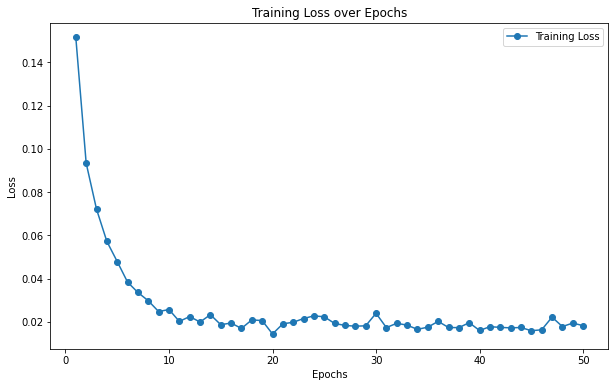

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

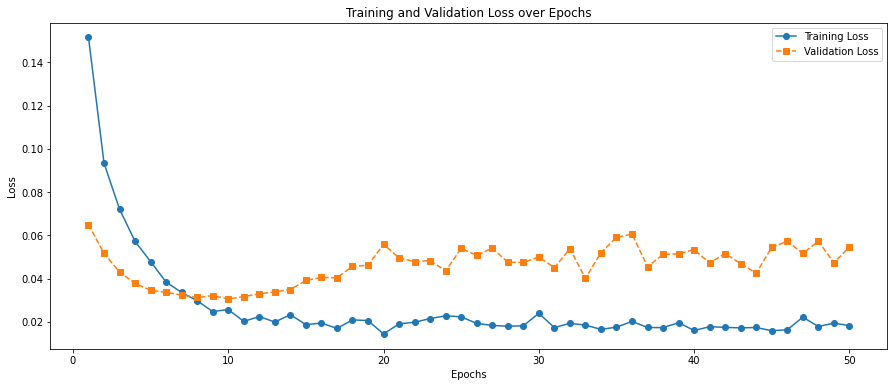

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bering_model_LT4/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 9ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.1769185464900983
MAE : 0.1618349837744849


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,235678.734375,32185.203
1,229818.187500,2490.551
2,193396.468750,1707.377
3,224681.203125,11293.282
4,259389.359375,49957.406
5,303458.250000,151973.751
6,337705.593750,466524.938
7,366635.156250,708542.184
8,359231.343750,652598.000
9,318475.875000,414216.785


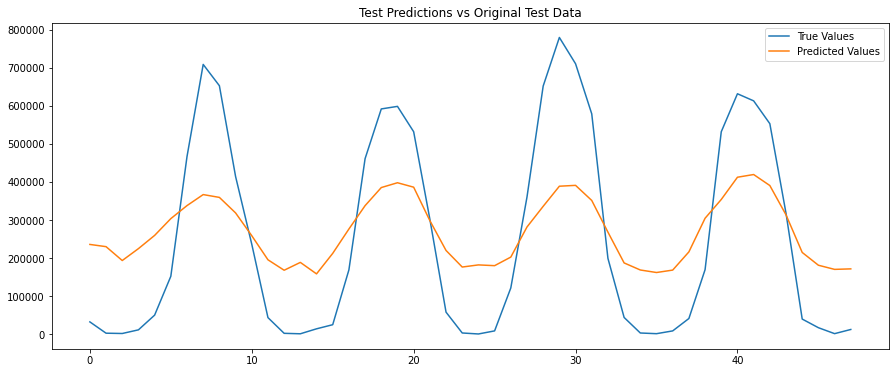

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

15/15 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

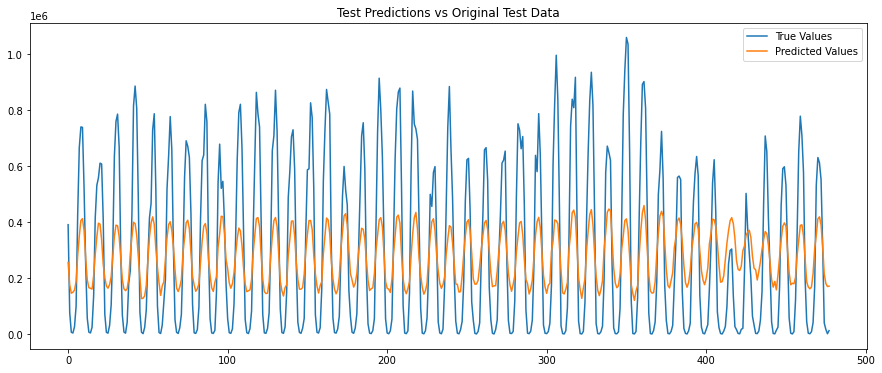

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()